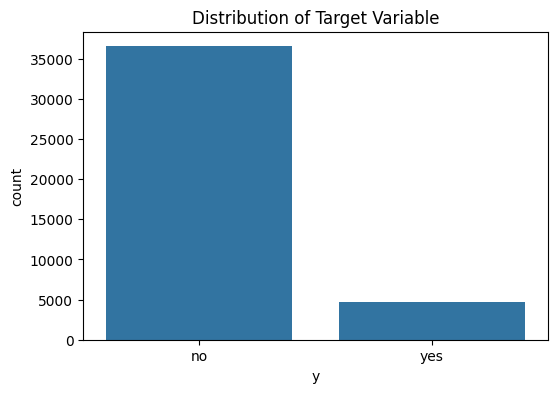

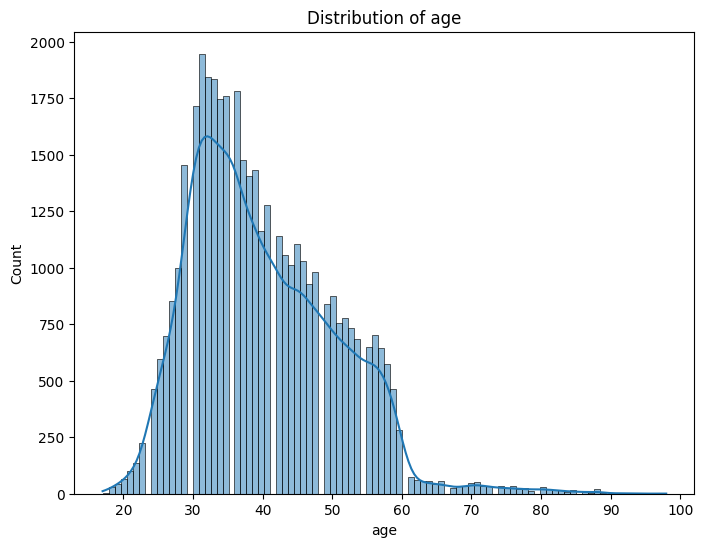

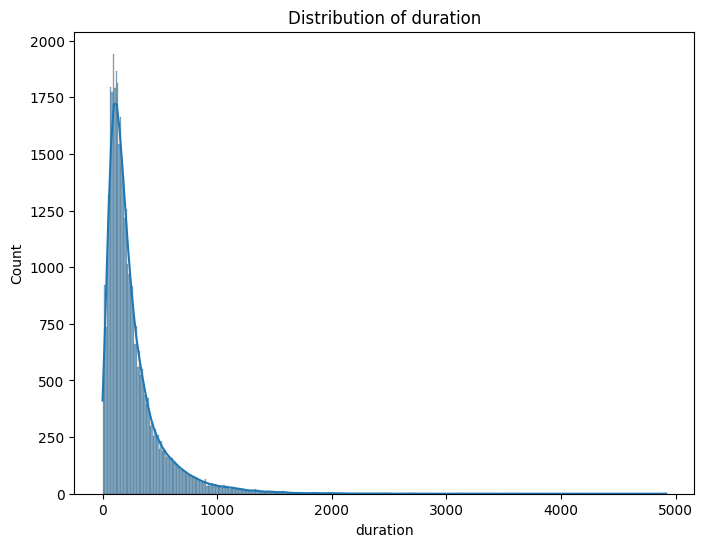

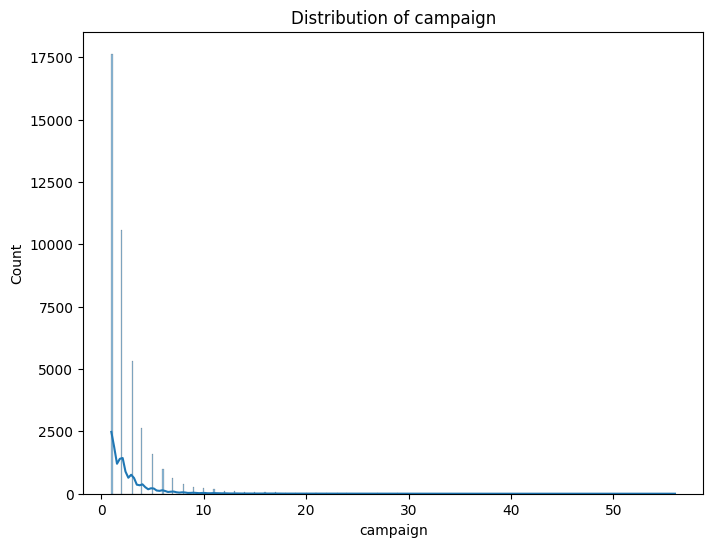

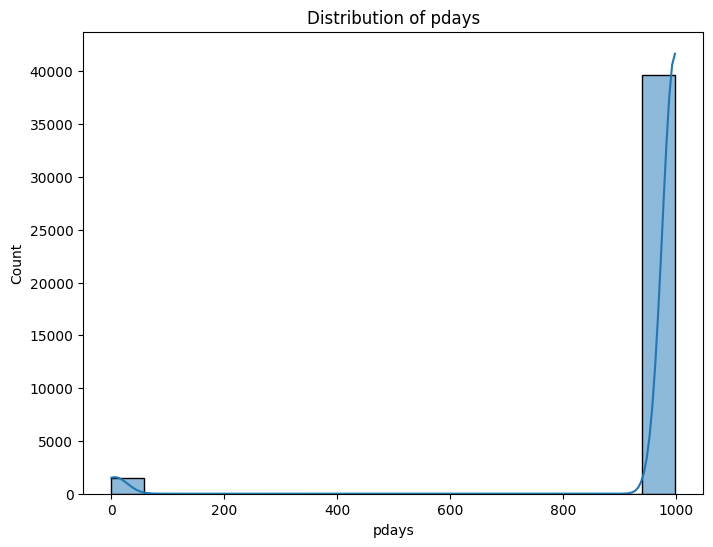

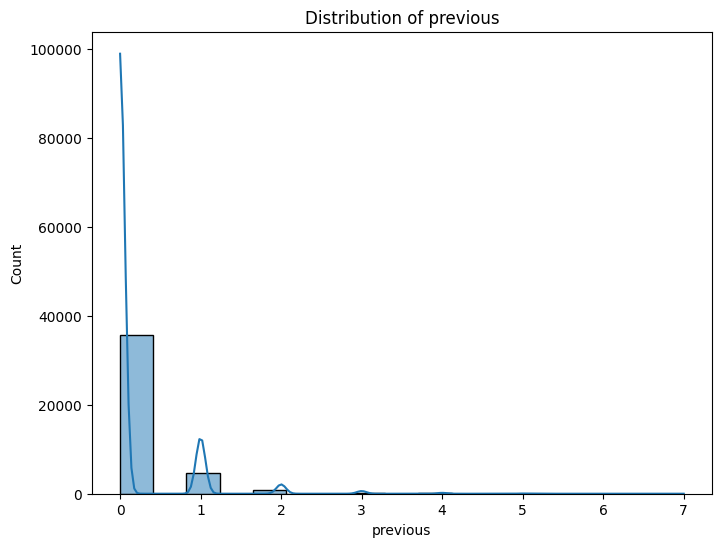

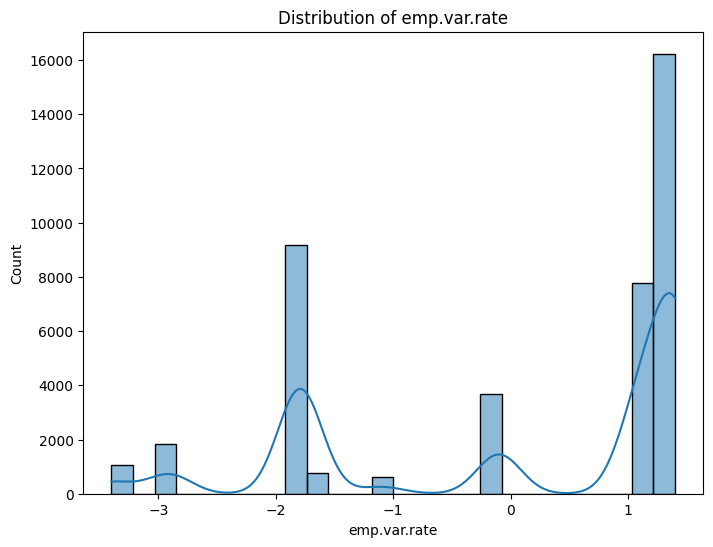

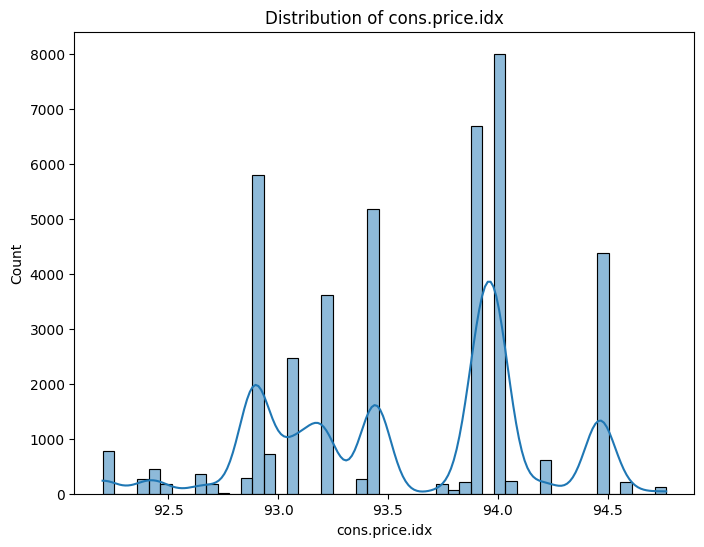

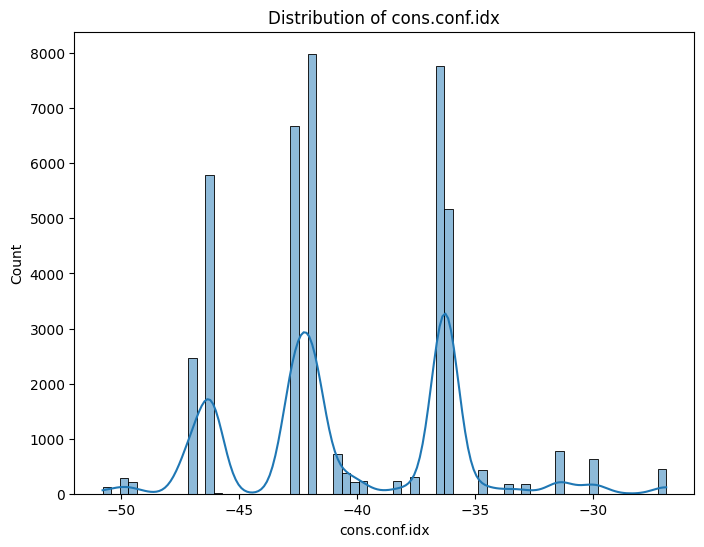

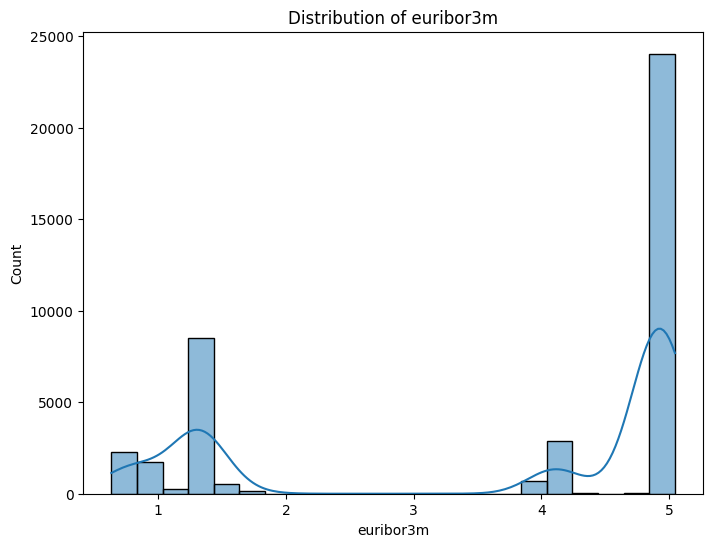

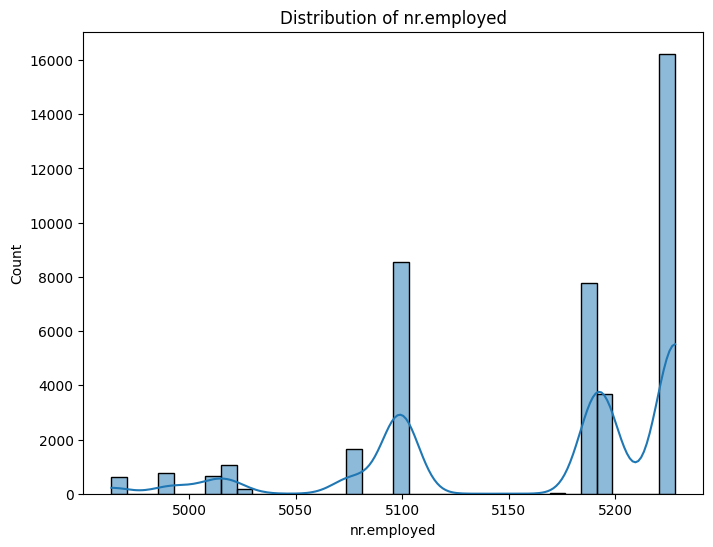

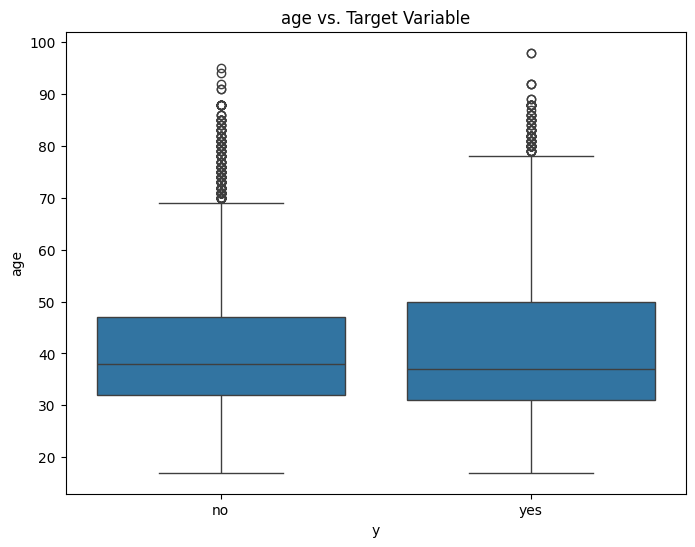

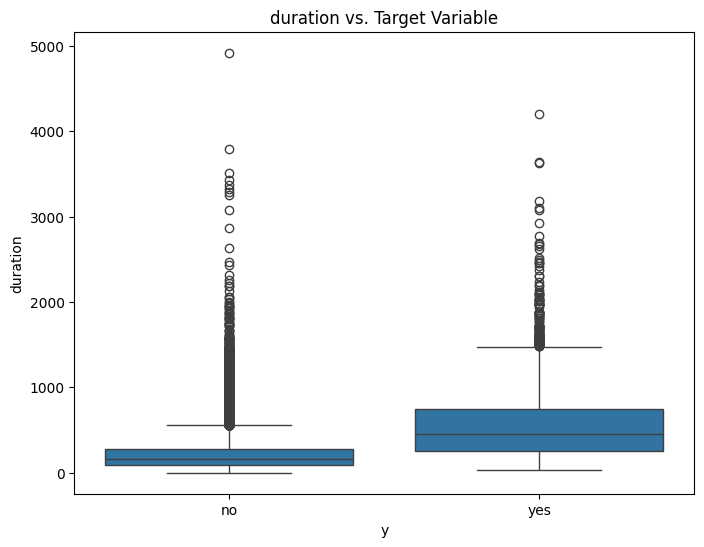

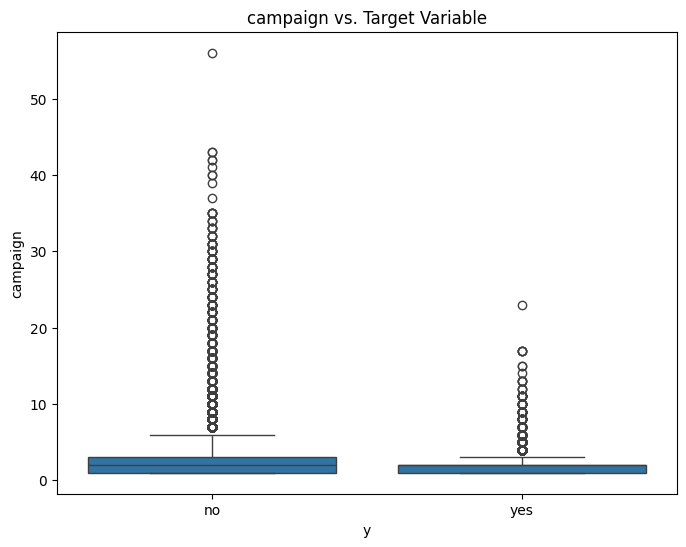

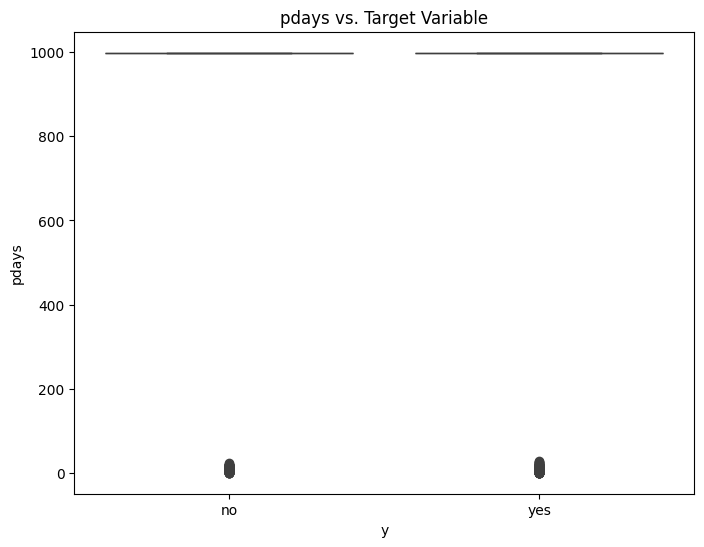

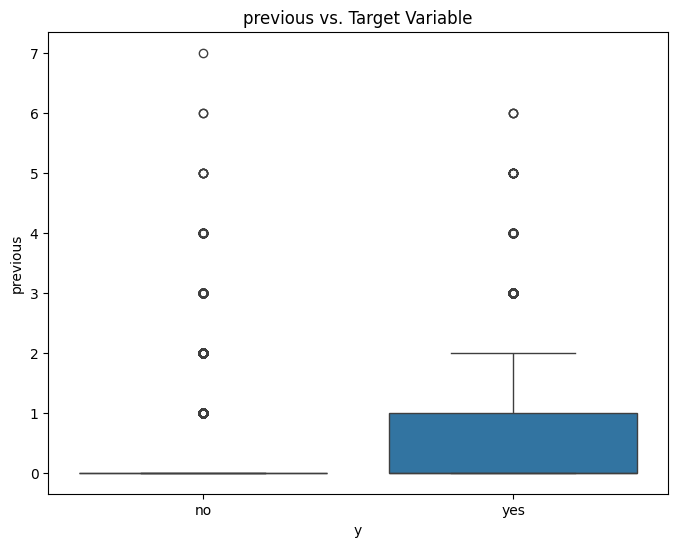

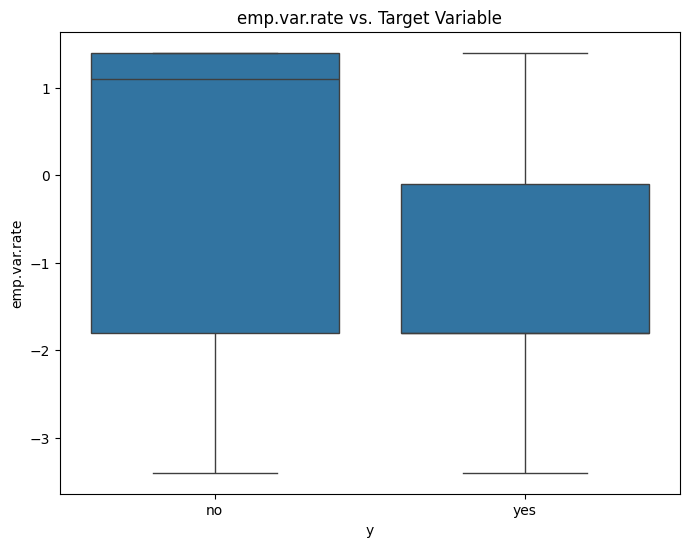

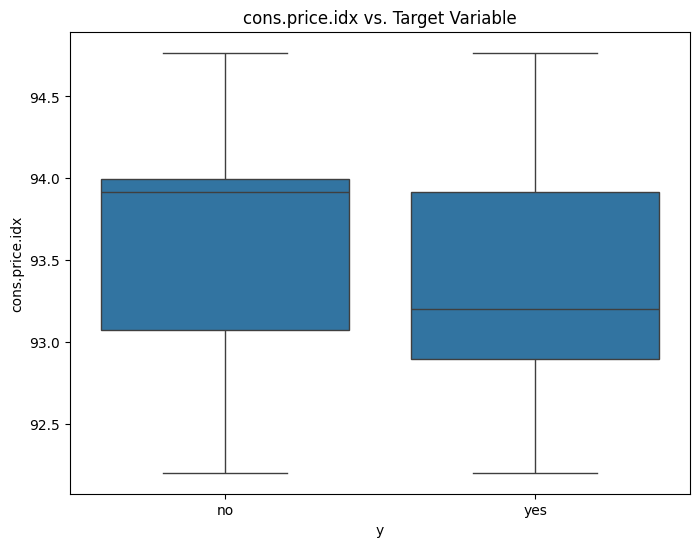

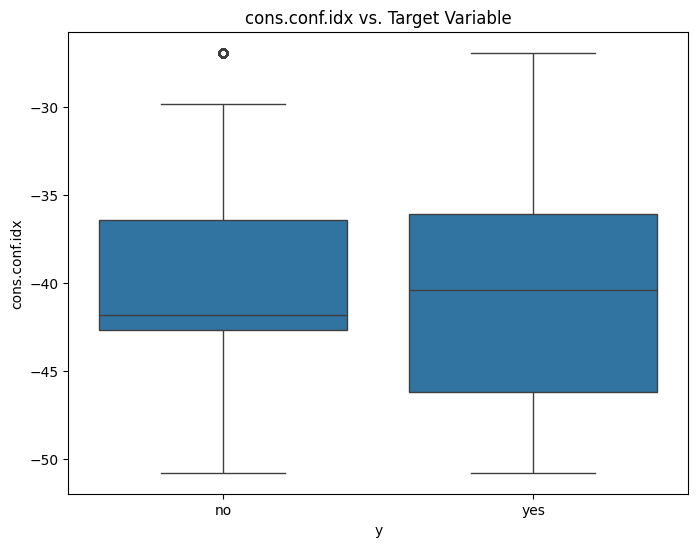

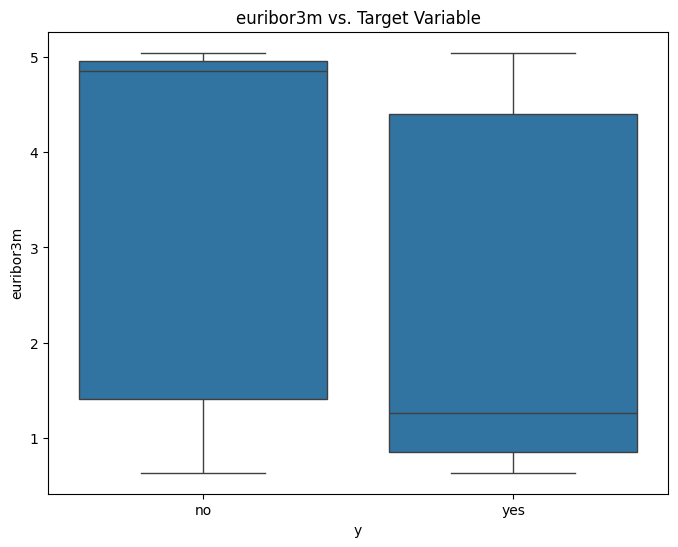

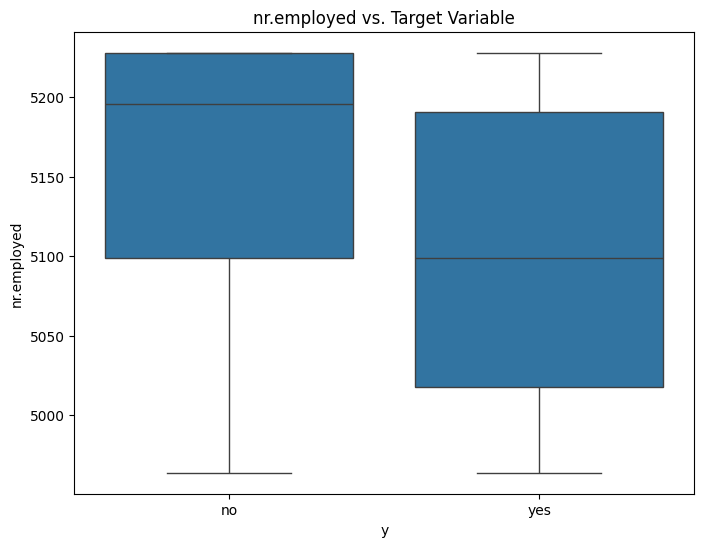

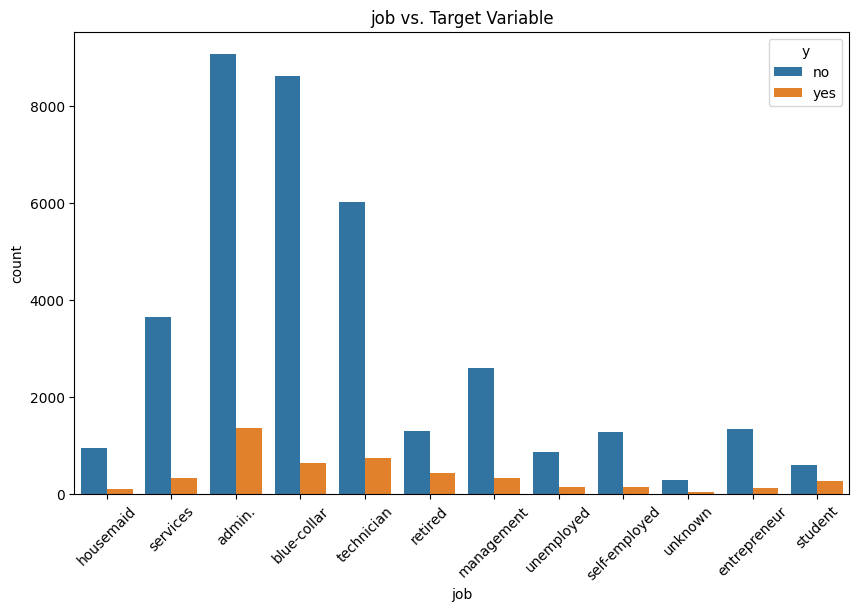

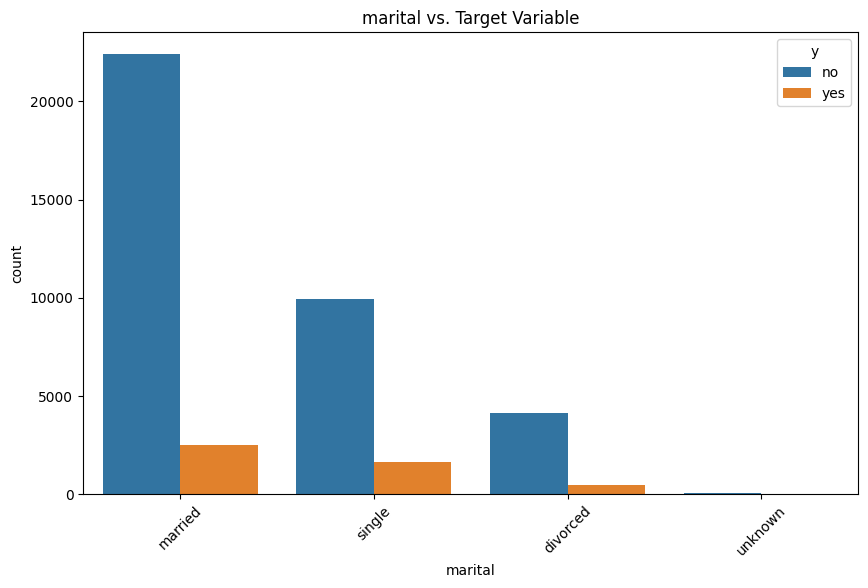

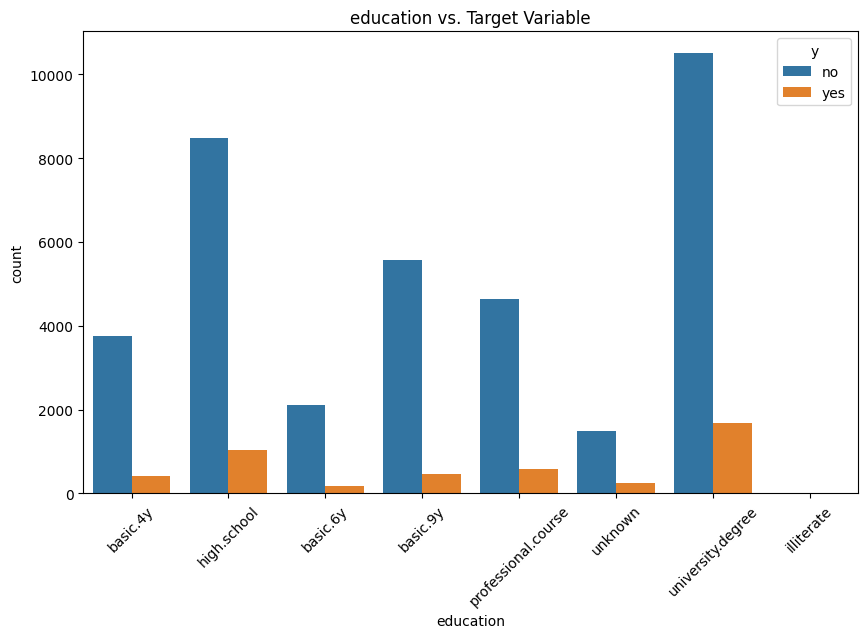

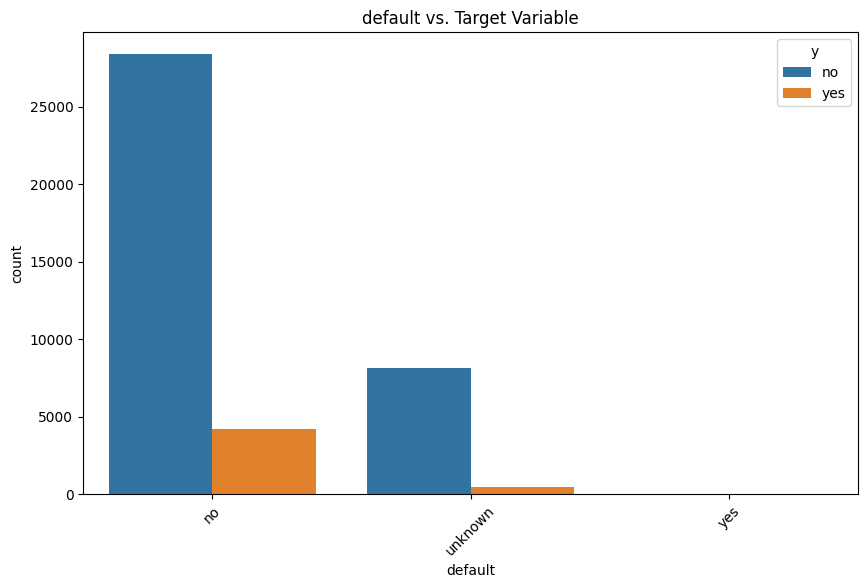

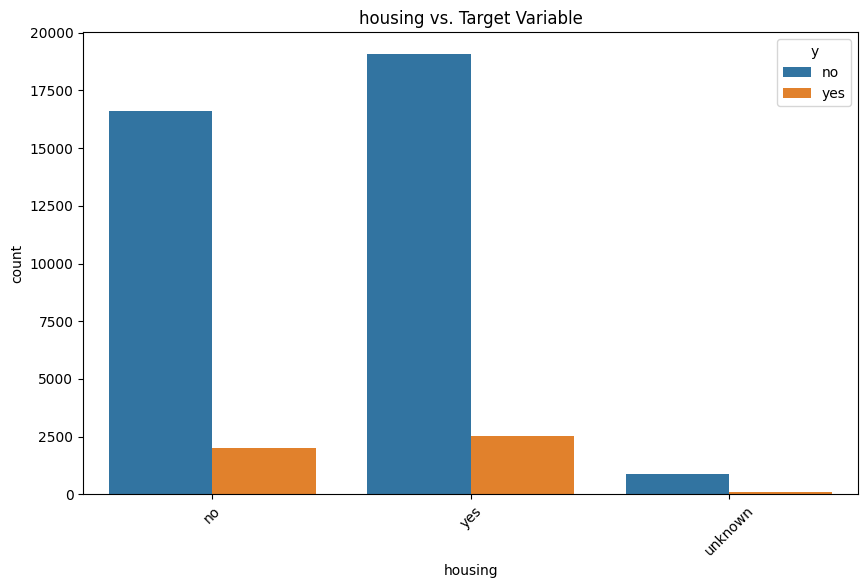

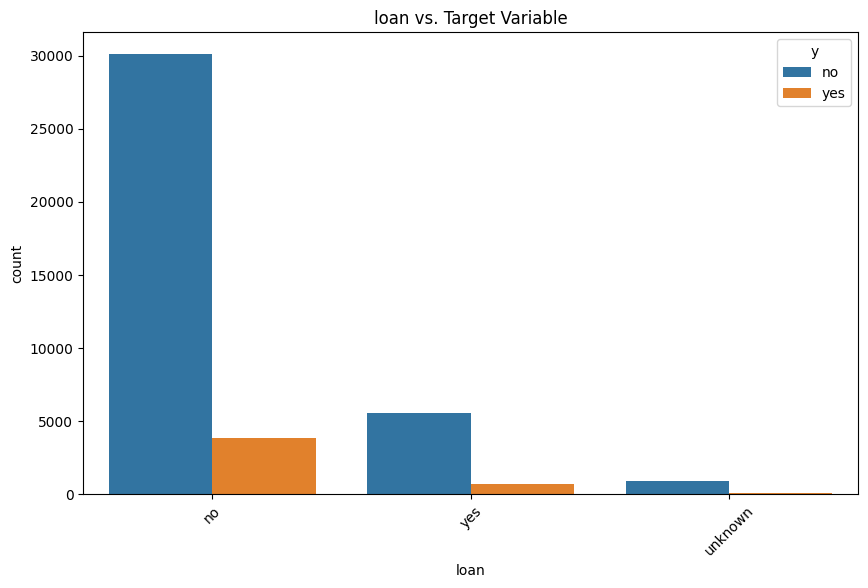

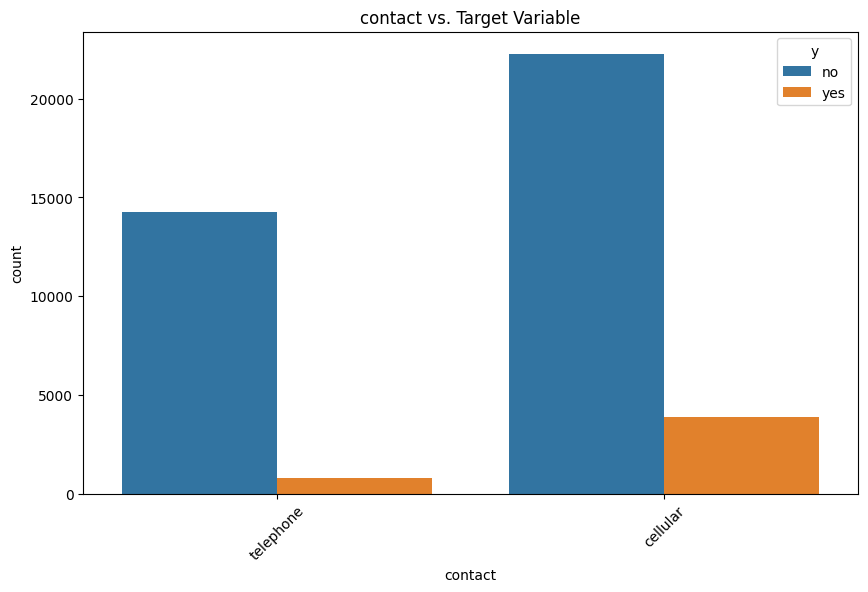

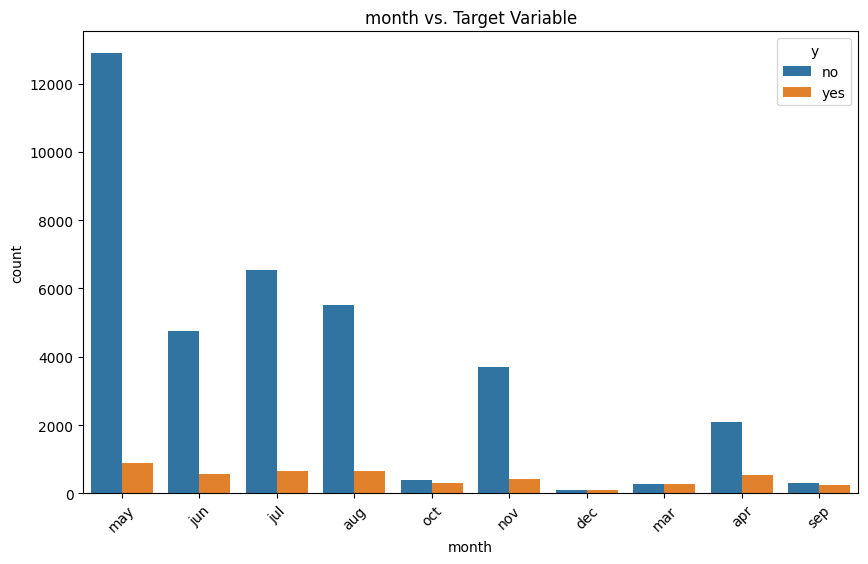

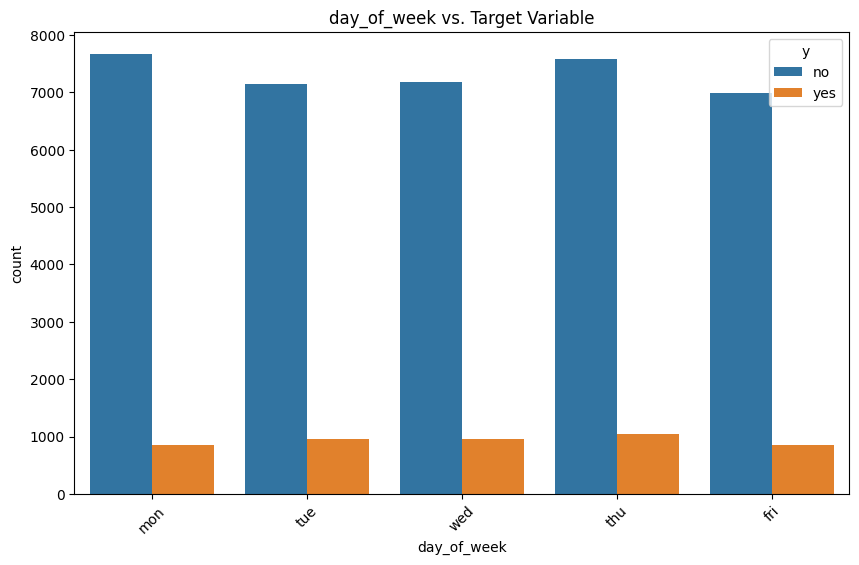

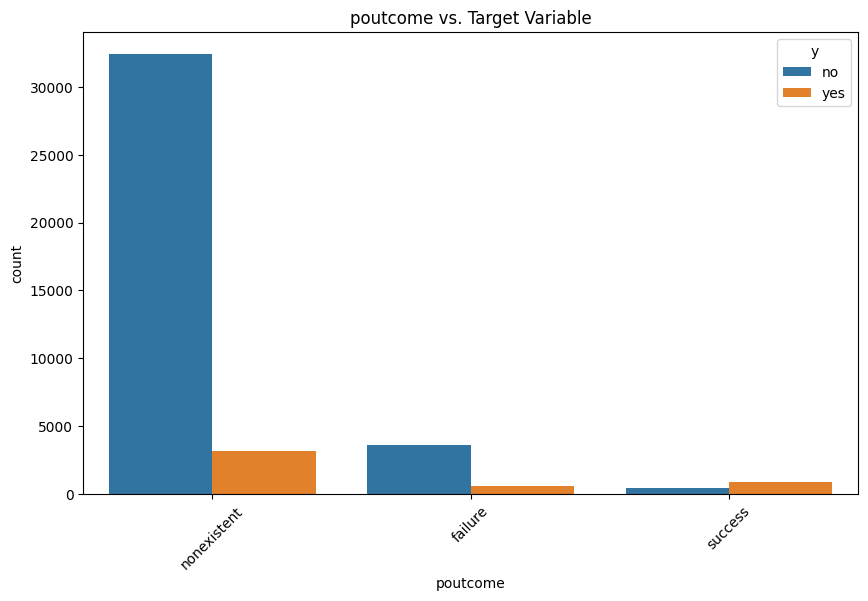

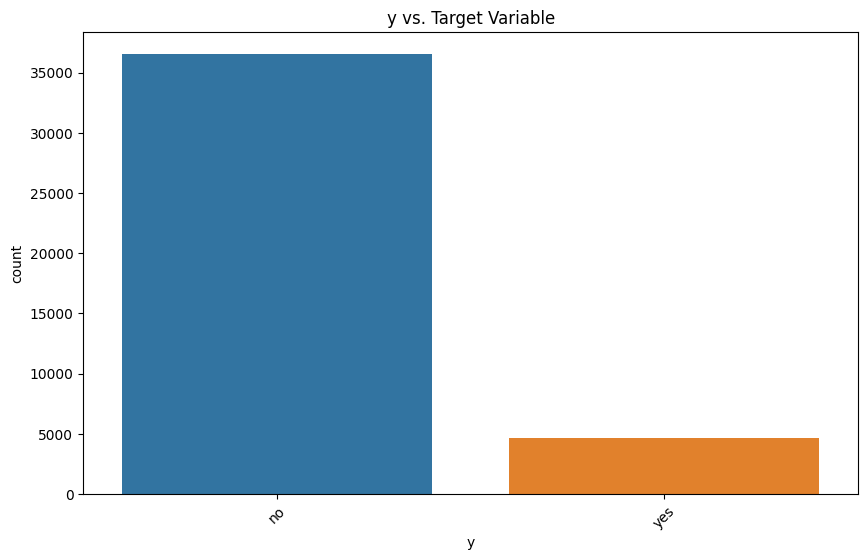

X_train: (28831, 54)
y_train: (28831,)
X_test: (12357, 54)
y_test: (12357,)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,793 (7.00 KB)

 Trainable params: 1,793 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.0324 - val_loss: 0.0049
Epoch 2/60
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.0040 - val_loss: 0.0022
Epoch 3/60
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.0020 - val_loss: 0.0015
Epoch 4/60
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/60
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.0012 - val_loss: 9.8228e-04
Epoch 6/60
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 9.6036e-04 - val_loss: 8.6831e-04
Epoch 7/60
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 8.5537e-04 - val_loss: 7.8804e-04
Epoch 8/60
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 7.6725e-04 - val_loss: 7.2391e-04
Epoch 9/60
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 7.2109e-04 - val_loss: 6.7116e-04
Epoch 10/60
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 6.5800e-04 - val_loss: 6.2805e-04
Epoch 11/60
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 6.3270e-04 -

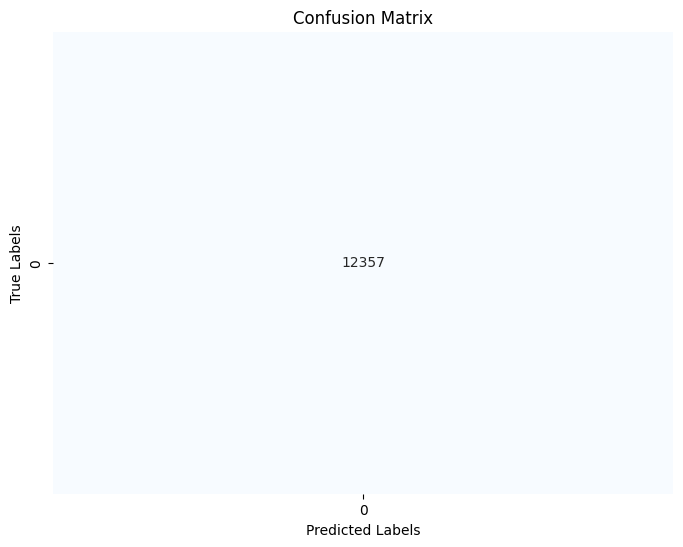

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt




warnings.filterwarnings('ignore')


df = pd.read_csv("bank-additional-full.csv", delimiter=';')
df.describe()


plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.show()


numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='y', y=feature, data=df)
    plt.title(f'{feature} vs. Target Variable')
    plt.show()



categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='y', data=df)
    plt.title(f'{feature} vs. Target Variable')
    plt.xticks(rotation=45)
    plt.show()


df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)



df_encoded['interaction_feature'] = df_encoded['age'] * df_encoded['campaign']


df.dropna(inplace=True)

X=df_encoded.drop('interaction_feature',axis=1)
y=df_encoded['interaction_feature']
y = (y == 'yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)


model = Sequential()
model.add (layers.Dense(32,activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add (layers.Dense(1, activation='linear'))
model.summary()


model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=60)
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

y_pred = (model.predict(X_test) > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
